## Resolução das equações de Laplace ou Poisson

Consideremos a equação de Poisson a duas dimensões espaciais:
$$\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2} = f,$$

em que $u$ representa o campo cujos valores queremos determinar em todo o domínio $\Omega$ (por exemplo $ (x,y) \in \Omega=(0,1)\times (0,1)$), e em que $f$ representa um termo fonte (ausente na equação de Laplace). Precisamos complementar a equação com as condições fronteira, que nos indicam alguma propriedade da função $u$ nos pontos da fronteira $u(x,y) = g(x,y), \ \ \  (x,y)\in\delta\Omega\text{ - fronteira}. $

Como já vimos, na sua forma discretizada, usando diferenças centrais para aproximar as derivadas de segunda ordem, numa grelha quadrada de lados $\Delta x=\Delta y=h$, a equação toma a forma:

$$\tilde{u}_{i,j}=\frac{\tilde{u}_{i+1,j}+\tilde{u}_{i-1,j} + \tilde{u}_{i,j+1}+\tilde{u}_{i,j-1}}{4}-f_{i,j}h^2.$$

(Para distinguir, usarei a notação $\tilde{u}$ para a função na grelha, enquanto $u$ é a função contínua num domínio contínuo.)

Temos que $h =\frac{x_{max}-x_{min}}{N} = \frac{y_{max}-y_{min}}{N}$, pelo que :
$$x[i] = x_{min} + ih \ \ \ \ i=0,1,2,\ldots, N$$ e $$y[i] = y_{min} + jh \ \ \ \ j=0,1,2,\ldots, N$$


In [4]:
# LIBRARY
# vector manipulation
import numpy as np
# math functions
import math 

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

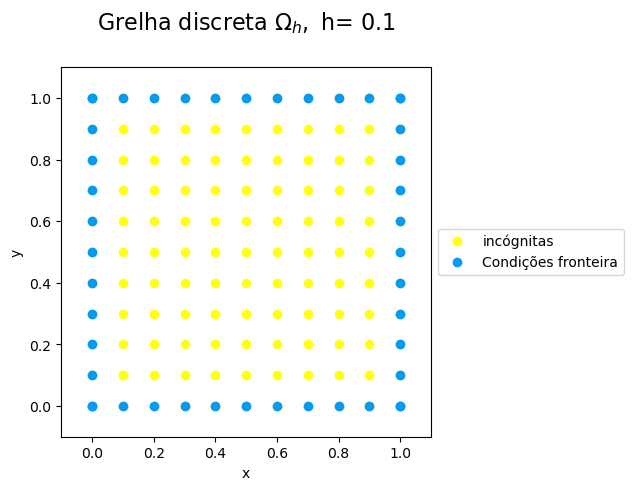

In [5]:
N=10
h=1/N
x=np.arange(0,1.0001,h)
y=np.arange(0,1.0001,h)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
plt.plot(x[1],y[1],'o',color="xkcd:yellow",label='incógnitas');
plt.plot(X,Y,'o',color="xkcd:yellow");
plt.plot(np.ones(N+1),y,'o',color="xkcd:azure",label='Condições fronteira');
plt.plot(np.zeros(N+1),y,'o',color="xkcd:azure");
plt.plot(x,np.zeros(N+1),'o',color="xkcd:azure");
plt.plot(x, np.ones(N+1),'o',color="xkcd:azure");
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.1))
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Grelha discreta $\Omega_h,$ h= %s'%(h),fontsize=16,y=1.08)
plt.show();

### Condições fronteira

Consideremos como exemplo condições fronteira de Dirichlet, mas não nulas (nem constantes!). Sejam, p.ex.,:
$$\tilde{u}_{i0}= \tilde{u}[i,0]=\sin(2\pi x[i]), \text{ para } i=0,...,10, \text{ topo},$$
$$ \tilde{u}_{iN}= \tilde{u}[i,N]=\sin(2\pi x[i]), \text{ para } i=0,...,10,  \text{ fundo},$$
$$   \tilde{u}_{0j}= \tilde{u}[0,j]=2\sin(2\pi y[j]), \text{ para } j=0,...,10,   \text{ esquerda},$$
$$ \tilde{u}_{Nj}= \tilde{u}[N,j]=2\sin(2\pi y[j]), \text{ para } i=0,...,10,\text{ direita}.$$



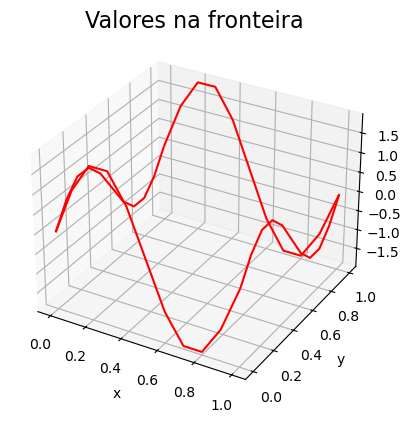

In [6]:
w = np.zeros((N+1,N+1))

for i in range (0,N):
        w[i,0]=np.sin(2*np.pi*x[i]) # fronteira esquerda
        w[i,N]=np.sin(2*np.pi*x[i]) # fronteira direita

for j in range (0,N):
        w[0,j]=2*np.sin(2*np.pi*y[j]) # fronteira de cima (topo)
        w[N,j]=2*np.sin(2*np.pi*y[j]) # fronteira de baixo (fundo)

        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='r', rstride=10, cstride=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')
plt.title(r'Valores na fronteira',fontsize=16,y=1.08)
plt.show()

### Método numérico

Como referido acima (e visto antes) a discretização da equação faz-se substituindo cada uma das segundas derivadas no espaço pelo operador da aproximação por diferenças centrais:
$$ \delta^2_x \tilde{u}_{i,j} = \frac{1}{h^2} ( \tilde{u}_{i+1,j}  -2\tilde{u}_{i,j} + \tilde{u}_{i-1,j}),$$ e
$$ \delta^2_y \tilde{u}_{i,j} = \frac{1}{h^2} ( \tilde{u}_{i,j+1}  -2\tilde{u}_{i,j}  +\tilde{u}_{i,j-1}).$$

A equação de Poisson discreta é assim:
$$-(\delta^2_x \tilde{u}_{i,j} + \delta^2_y \tilde{u}_{i,j}) = f_{i,j} \ \ \ \ \ \ (x_i,y_j)\in \Omega
$$ completada por
$$  \tilde{u}_{ij}=g_{ij} \ \ (x_i,y_j) \in \partial\Omega_h. $$

Expandindo os operadores de diferenças centrais chegamos à fórmula do método de 5 pontos (stencil de 5 pontos):
$$\begin{equation}-(\tilde{u}_{i-1,j}+\tilde{u}_{i,j-1}-4\tilde{u}_{i,j}+\tilde{u}_{i,j+1}+\tilde{u}_{i+1,j})=h^2f_{ij} \end{equation}
$$
para $i=1,2,\ldots, N-1$ e $j=1,2,\ldots, N-1$, que podemos abreviar com a notação:
$$ \nabla^2_h \tilde{u}_{i,j} = h^2f_{ij}.$$

### Forma matricial

O sistema de $(N_x-1)\times(N_y-1)$  equação anterior pode ser escrita na forma matricial (nota: acima usei $N$ para ambas as direções; num domínio rectangular isso não acontece):
$$ A \mathbf{\tilde{u}} = \mathbf{b},$$

onde $A$ é uma matriz $(N_x-1)\times(N_y-1)\times (N_x-1)\times(N_y-1) = (N_x-1)^2\times(N_y-1)^2$, com a forma tridiagonal por blocos:
$$\begin{equation}\left(\begin{array}{ccccccc}
T&I&0&0&.&.&.\\
I&T&I&0&0&.&.\\
.&.&.&.&.&.&.\\
.&.&.&0&I&T&I\\
.&.&.&.&0&I&T\\
\end{array}\right),
\end{equation}
$$
em que $I$ representa a matriz identidade de ordem $(N_x-1)^2$ (se usarmos ordenação _column-major_!), e $T$ é uam matriz tridiagonal da forma:
$$\begin{equation} T=\left(\begin{array}{ccccccc}
-4&1&0&0&.&.&.\\
1&-4&1&0&0&.&.\\
.&.&.&.&.&.&.\\
.&.&.&0&1&-4&1\\
.&.&.&.&0&1&-4\\
\end{array}\right).
\end{equation}
$$

Podemos visualizar a forma destas matrizes graficamente com um _plot_ de densidades:

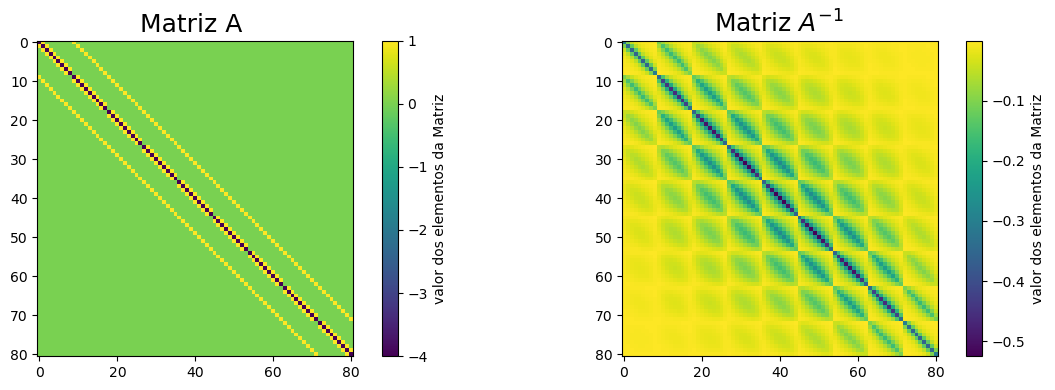

In [7]:
N2=(N-1)*(N-1)
A=np.zeros((N2,N2))
## Diagonal            
for i in range (0,N-1):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j]=-4

# SUB-DIAGONAL INFERIOR      
for i in range (1,N-1):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j-1]=1   
#  SUB-DIAGONAL    SUPERIOR     
for i in range (0,N-2):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j+1]=1   

# MATRIX IDENTIDADE INFERIOR
for i in range (0,N-1):
    for j in range (1,N-1):           
        A[i+(N-1)*j,i+(N-1)*(j-1)]=1        
        
        
# MATRIX IDENTIDADE SUPERIOR
for i in range (0,N-1):
    for j in range (0,N-2):           
        A[i+(N-1)*j,i+(N-1)*(j+1)]=1
Ainv=np.linalg.inv(A)   
fig = plt.figure(figsize=(12,4));
plt.subplot(121)
plt.imshow(A,interpolation='none');
clb=plt.colorbar();
clb.set_label('valor dos elementos da Matriz');
plt.title('Matriz A ',fontsize=18)
plt.subplot(122)
plt.imshow(Ainv,interpolation='none');
clb=plt.colorbar();
clb.set_label('valor dos elementos da Matriz');
plt.title(r'Matriz $A^{-1}$ ',fontsize=18)

fig.tight_layout()
plt.show();

O vector $\mathbf{\tilde{u}}$ tem comprimento $(N_x-1)\times(N_y-1)$ e é constituído por $N_y-1$ subvectores $\mathbf{\tilde{u}_j}$ cada um de comprimento $(N_x-1)$ da forma:

$$\mathbf{\tilde{u}}_j=\left(\begin{array}{c}
\tilde{u}_{1,j}\\
\tilde{u}_{2,j}\\
.\\
.\\
\tilde{u}_{N_x-2,j}\\
\tilde{u}_{N_x-1,j}\\
\end{array}\right).
$$

Por seu lado o vector $\mathbf{b}$ tem comprimento $(N_x-1)\times(N_y-1)$, também constituído por $N_y-1$ subvectores $\mathbf{b}_j = -h^2 \mathbf{f}_j -\mathbf{bx}_{j}-\mathbf{by}_j$, em que $\mathbf{bx}_j$ é o vector das condições fronteira à direita e à esquerda:
$$\begin{equation}\mathbf{bx}_j =\left(\begin{array}{c}
\tilde{u}_{0,j}\\
0\\
.\\
.\\
0\\
\tilde{u}_{N_x,j}
\end{array}\right),
\end{equation}
$$ 
para cada um dos $j=1,\ldots, N_y-1$, em que $\mathbf{by}_j$ com $j=1$ é o vector das condições fronteira no fundo:
$$ \begin{equation}
\mathbf{by}_{1} =\left(\begin{array}{c}
w_{1,0}\\
w_{2,0}\\
.\\
.\\
w_{N_x-2,0}\\
w_{N_x-1,0}\\
\end{array}\right),
\end{equation}
$$
em que $\mathbf{by}_j$ com $j=N_y1$ é o vector das condições fronteira no topo:
$$\begin{equation}
\mathbf{by}_{N_y-1} =\left(\begin{array}{c}
w_{1,N_y}\\
w_{2,N_y}\\
.\\
.\\
w_{N_x-2,N_y}\\
w_{N_x-1,N_y}\\
\end{array}\right),
\end{equation}
$$
e $\mathbf{by}_j=0$ quando $j=2,\ldots, N_y-2$, e finalmente:
$$\begin{equation}\mathbf{f}_j =-\left(\begin{array}{c}
0\\
0\\
.\\
.\\
0\\
0\\
\end{array}\right)
\end{equation}
$$
quando $j=1,...,N_y-1$.


In [9]:
b = np.zeros(N2) 

# vector b      
for i in range (0,N-1):
    for j in range (0,N-1):           
        b[i+(N-1)*j] = -h*h*0   # Laplace   
# fronteira        
by_fundo_topo = np.zeros(N2)
for i in range (0,N-1):
    by_fundo_topo[i] = np.sin(2*np.pi*x[i+1]) # fronteira do fundo
    by_fundo_topo[i+(N-1)*(N-2)] = np.sin(2*np.pi*x[i+1])# fronteira do topo
      
bx_left_right = np.zeros(N2)
for j in range (0,N-1):
    bx_left_right[(N-1)*j] = 2*np.sin(2*np.pi*y[j+1]) # fronteira esquerda
    bx_left_right[N-2+(N-1)*j] = 2*np.sin(2*np.pi*y[j+1])# fronteira direita
    
bxy = bx_left_right + by_fundo_topo

### Resultados

Para um sistema de equações prqueno (como é o exemplo com $10\times 10$ acima) podemos usar um método directo, invertendo  matriz $A$:
$$\mathbf{\tilde{u}} = A^{-1}\mathbf{\tilde{b}}.$$ Para fazer um _plot_ dos resultados voltamos a escrever o vector $\mathbf{\tilde{b}}$ como uma matriz 2D.

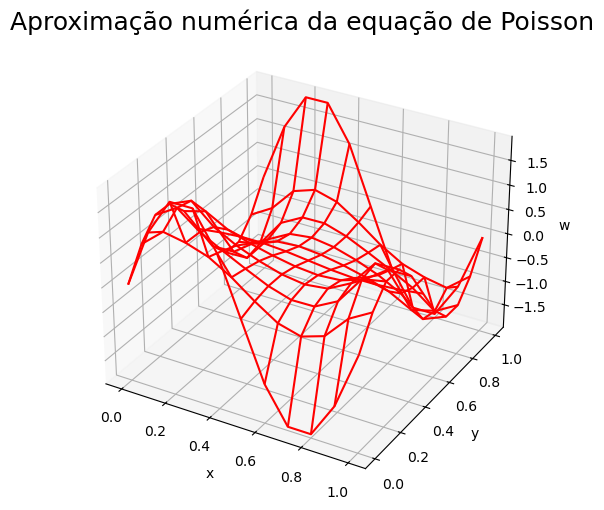

In [10]:
C=np.dot(Ainv,b-bxy)
w[1:N,1:N]=C.reshape((N-1,N-1))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d');
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='r');
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('w');
plt.title(r'Aproximação numérica da equação de Poisson',fontsize=18,y=1.08);
plt.show();

## 
Consistência e convergência

Quão bem é que a função na grelha aproxima os resultados da solução exacta do problema de Poisson?

### Definição de Consistência 

Seja 
$$\begin{equation}\nabla^2_h(\varphi)=-(\varphi_{i-1j}+\varphi_{ij-1}-4\varphi_{ij}+\varphi_{ij+1}+\varphi_{i+1j})\end{equation}$$
a aproximação de diferenças fiinitas numa grelha $\Omega_h$ de passo $h$ , ao operador diferencial
$$ \begin{equation}\nabla^2(\varphi)=\frac{\partial^2 \varphi}{\partial x^2}+\frac{\partial^2 \varphi}{\partial y^2}\end{equation}
$$
definido numa região simplesmente conexa  e aberta $\Omega \subset R^2$. Para uma dada função suave (continuamente diferenciável) $\varphi$ aí definida, o erro de truncagem de $\nabla^2_h$ é:
$$\begin{equation}\tau_{h}(\mathbf{x})=(\nabla^2-\nabla^2_h)\varphi(\mathbf{x}) \end{equation}.$$

Então a aproximação $\nabla^2_h$ é consistente com $\nabla^2$ se:
$$\begin{equation} \lim_{h\rightarrow 0}\tau_h(\mathbf{x})=0,\end{equation}$$
para todo o $\mathbf{x} \in \Omega$ e todo o $\varphi \in C^{\infty}(\Omega)$. A aproximação é consistente à ordem $p$ se $\tau_h(\mathbf{x})=\mathcal{O}(h^p).$

#### Prova da Consistência do stencil de 5 pontos

Seja uma função suave $\varphi$ e um ponto no domínio, $(x,y)$ tal que $(x\pm h, y),(x,y \pm h)$ pertencem à região mais a fronteira. Pelo teorema de Taylor:
$$\begin{eqnarray*}
\varphi(x\pm h,y)&=&\varphi(x,y) \pm h \frac{\partial \varphi}{\partial x}(x,y)+\frac{h^2}{2!}\frac{\partial^2 \varphi}{\partial x^2}(x,y) \pm\frac{h^3}{3!}\frac{\partial^3 \varphi}{\partial x^3}(x,y)+\frac{h^4}{4!}\frac{\partial^4 \varphi}{\partial x^4}(\zeta^{\pm},y)
\end{eqnarray*}
$$
onde $\zeta^{\pm} \in (x-h,x+h)$. Somando estas duas equações e reagrupando termos, temos:
$$\begin{equation}\frac{1}{h^2}[\varphi(x+h,y)-2\varphi(x,y)+\varphi(x-h,y) ] -\frac{\partial^2 \varphi}{\partial x^2}(x,y)=\frac{h^2}{4!}\left[\frac{\partial^4 \varphi}{\partial x^4}(\zeta^{+},y)+
\frac{\partial^4 \varphi}{\partial x^4}(\zeta^{-},y)
 \right]
\end{equation}
$$
Pelo teorema do valor intermédio sabemos que:
$$\begin{equation}\left[\frac{\partial^4 \varphi}{\partial x^4}(\zeta^{+},y)+
\frac{\partial^4 \varphi}{\partial x^4}(\zeta^{-},y)
 \right]
=2\frac{\partial^4 \varphi}{\partial x^4}(\zeta,y),\end{equation}
$$
para algum $\zeta \in (x-h,x+h)$. Logo:
$$\begin{equation}\delta_x^2(x,y)
=\frac{\partial^2 \varphi}{\partial x^2}(x,y)+\frac{h^2}{2!}\frac{\partial^4 \varphi}{\partial x^4}(\zeta,y)\end{equation}
$$

Um desenvolvimento análogo mostra que :
$$\begin{equation}\delta_y^2(x,y)
=\frac{\partial^2 \varphi}{\partial y^2}(x,y)+\frac{h^2}{2!}\frac{\partial^4 \varphi}{\partial y^4}(x,\eta)
\end{equation}
$$
para algum $\eta \in (y-h,y+h)$. Então conclui-se que:
$$\tau_h(x,y)=(\nabla^2-\nabla^2_h)\varphi(x,y)=O(h^2).$$

### Definição de Convergência 

Seja $\nabla^2_hw(\mathbf{x}_j)=f(\mathbf{x}_j)$ uma aproximação de diferenças finitas, definido  numa grelha de tamanho $h$, a uma
PDE $\nabla^2 u(\mathbf{x})=f(\mathbf{x})$ numa região simplesmente conexa $\Omega \subset R^2$. Suponhamos que $w(x,y)=u(x,y)$ em todos os pontos $(x,y)$ na fronteira $\partial \Omega$. Dizemos que o esquema de diferenças finitas converge se:

$$\begin{equation} \max_j|U(\mathbf{x}_j)-w(\mathbf{x}_j)| \rightarrow 0 \mbox{  quando  } h \rightarrow 0.\end{equation}
$$

Podemos enunciar alguns resultados, que são expressos mais facilmente à custa de algumas quantidades que passamos a definir.

Se $\nabla^2_hV_{ij}\geq 0$ em todos os pontos $(x_i,y_j)$ da grelha $\Omega_h$, então $\max (V_{i,j})_{|\Omega} \le \max (V_{i,j})_{|\delta\Omega}$. De modo análogo, se $\nabla^2_hV_{ij}\leq 0$ em todos os pontos $(x_i,y_j)$ da grelha $\Omega_h$, então $\max (V_{i,j})_{|\Omega} \ge \max (V_{i,j})_{|\delta\Omega}$.

A função nula na grelha 